Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.99798
Precision: 0.9664596273291925
Recall: 0.8620498614958448
F1 Score: 0.9112737920937043
ROC AUC: 0.9998037230836552


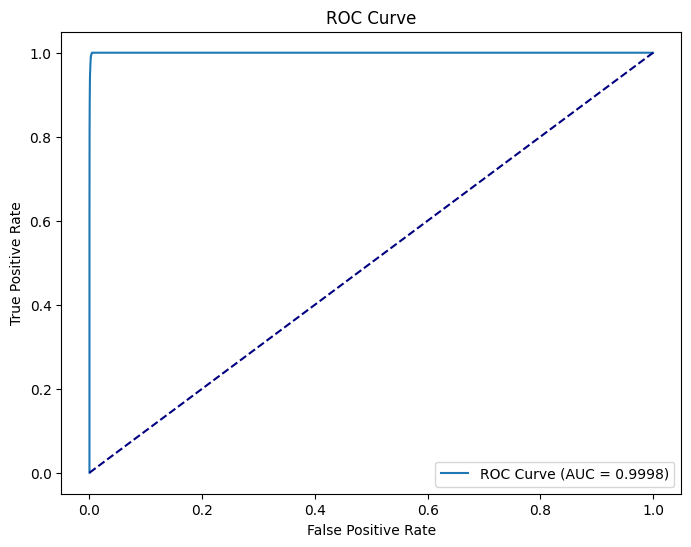

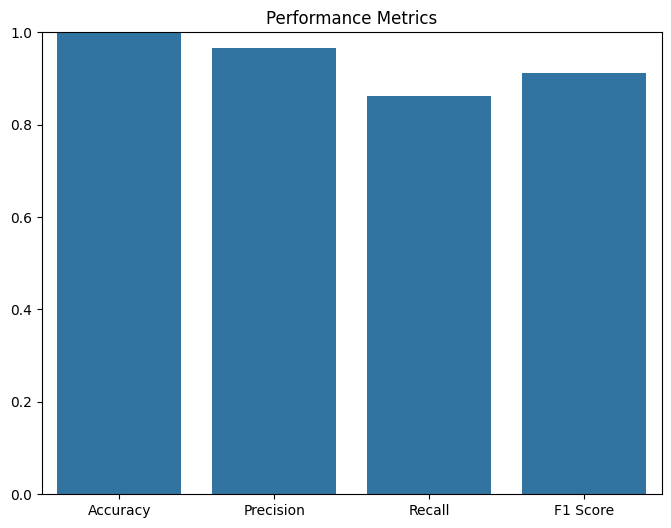

<Figure size 1000x600 with 0 Axes>

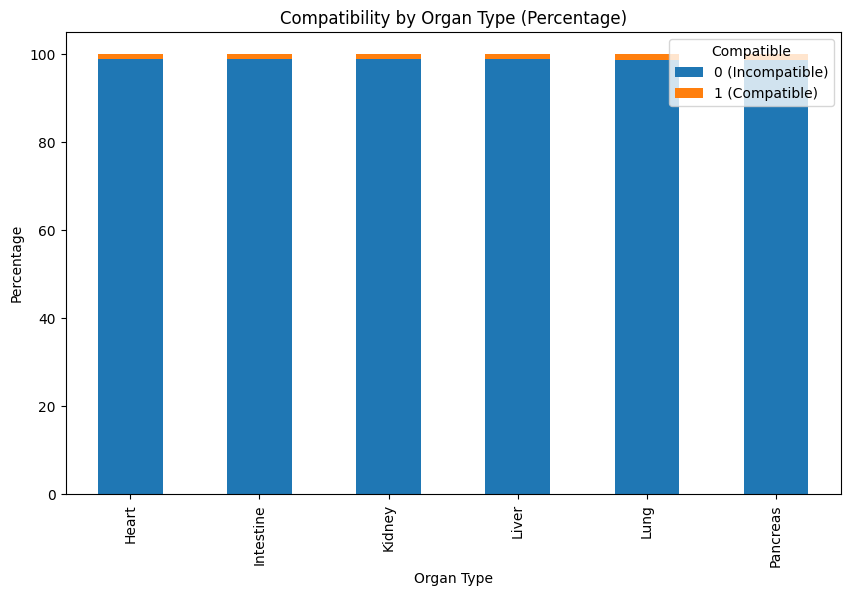

<Figure size 1200x600 with 0 Axes>

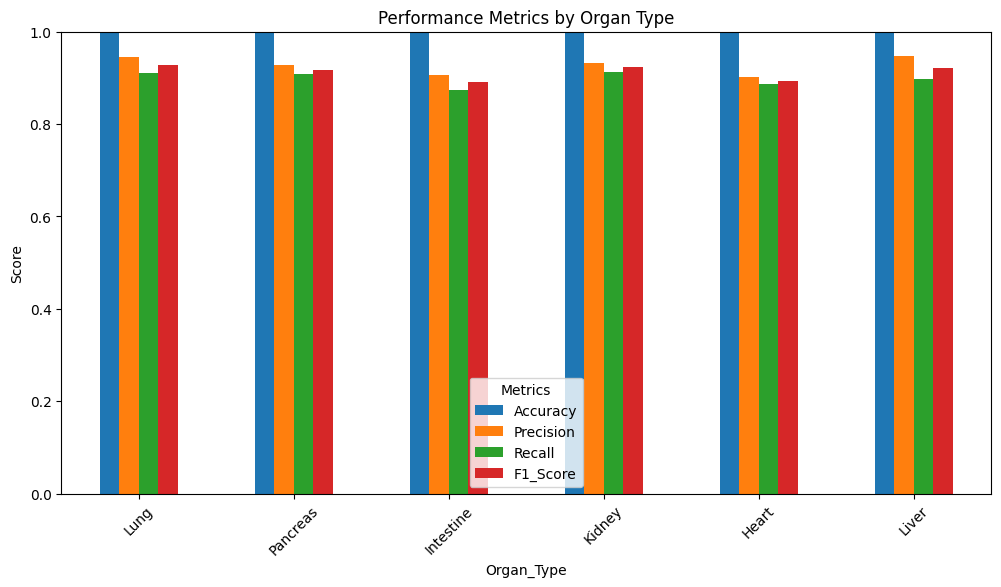

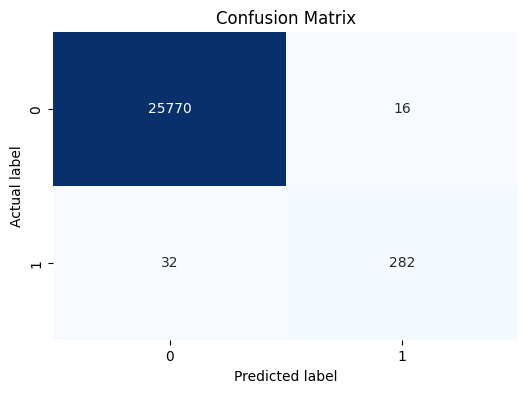

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the compatibility dataset
data = pd.read_csv('/content/drive/MyDrive/3rd Year Project/organ_compatibility_dataset.csv')

# Drop unnecessary columns
X = data.drop(['Compatible', 'Donor_ID', 'Recipient_ID'], axis=1)
y = data['Compatible']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline: scale numeric features and encode categorical features
numerical_features = ['Donor_Age', 'Recipient_Age', 'Wait_Time_Months', 'Priority_Level']
categorical_features = ['Donor_Gender', 'Recipient_Gender', 'Donor_Blood_Type', 'Recipient_Blood_Type', 'Organ_Type', 'Organ_Type_Needed']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Model pipeline with Random Forest
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]  # Get probability estimates for ROC curve

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Accuracy graph
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.show()

# Compatibility graph for each organ type
plt.figure(figsize=(10, 6))

# Calculate the percentage of compatibility for each organ type
compatibility_percent = (
    data.groupby(['Organ_Type', 'Compatible']).size().unstack().fillna(0)
)
compatibility_percent = compatibility_percent.div(compatibility_percent.sum(axis=1), axis=0) * 100

# Reset the index for plotting
compatibility_percent = compatibility_percent.reset_index()

# Plot the compatibility as stacked bar plot
compatibility_percent.plot(x='Organ_Type', kind='bar', stacked=True, figsize=(10, 6))
plt.title('Compatibility by Organ Type (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Organ Type')
plt.legend(title='Compatible', loc='upper right', labels=['0 (Incompatible)', '1 (Compatible)'])
plt.show()


# Performance evaluation for each organ
organ_types = data['Organ_Type'].unique()
performance_data = []

for organ in organ_types:
    # Filter data for each organ type
    organ_data = data[data['Organ_Type'] == organ]

    # Define features and target variable for that organ
    X = organ_data.drop(['Compatible', 'Donor_ID', 'Recipient_ID'], axis=1)
    y = organ_data['Compatible']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = model_pipeline.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store performance data
    performance_data.append({
        'Organ_Type': organ,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    })

# Convert performance data into a DataFrame for plotting
performance_df = pd.DataFrame(performance_data)

# Plot the performance metrics
plt.figure(figsize=(12, 6))
performance_df.set_index('Organ_Type').plot(kind='bar', figsize=(12, 6))
plt.title('Performance Metrics by Organ Type')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.legend(title='Metrics')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()


In [2]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mount Google Drive
drive.mount('/content/drive')

# Load the donor and recipient datasets
donors = pd.read_csv('/content/drive/MyDrive/3rd Year Project/donors.csv')
recipients = pd.read_csv('/content/drive/MyDrive/3rd Year Project/recipients.csv')

# Prepare compatibility dataset for model training
data = pd.read_csv('/content/drive/MyDrive/3rd Year Project/organ_compatibility_dataset.csv')

# Drop unnecessary columns and prepare features and labels
X = data.drop(['Compatible', 'Donor_ID', 'Recipient_ID'], axis=1)
y = data['Compatible']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing and model pipeline
numerical_features = ['Donor_Age', 'Recipient_Age', 'Wait_Time_Months', 'Priority_Level']
categorical_features = ['Donor_Gender', 'Recipient_Gender', 'Donor_Blood_Type', 'Recipient_Blood_Type', 'Organ_Type', 'Organ_Type_Needed']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Donor_Age', 'Recipient_Age',
                                                   'Wait_Time_Months',
                                                   'Priority_Level']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Donor_Gender',
                                                   'Recipient_Gender',
                                                   'Donor_Blood_Type',
                                                   'Recipient_Blood_Type',
                                                   'Organ_Type',
                                                   'Organ_Type_Needed'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [5]:
import joblib

# Save the model to a file
joblib_file = '/content/drive/MyDrive/3rd Year Project/organ_transplantation_model.pkl'  # Specify the path where you want to save the model
joblib.dump(model_pipeline, joblib_file)

print(f"Model saved to {joblib_file}")


Model saved to /content/drive/MyDrive/3rd Year Project/organ_transplantation_model.pkl


In [4]:

# Now, proceed with the donor recipient matching code
example_donor = donors.iloc[6]  # Use the donor you want to evaluate

def recommend_best_recipient(donor, recipients, model):
    """
    Recommend the most compatible recipient for a given donor.
    """
    recipients_copy = recipients.copy()
    donors_repeated = pd.DataFrame([donor] * len(recipients_copy))  # Repeat donor for each recipient
    combined = pd.concat([donors_repeated.reset_index(drop=True), recipients_copy.reset_index(drop=True)], axis=1)

    # Predict compatibility
    compatibility_scores = model.predict(combined)

    # Add compatibility scores to recipients DataFrame
    recipients_copy['Compatibility_Score'] = compatibility_scores
    best_recipient = recipients_copy.loc[recipients_copy['Compatibility_Score'].idxmax()]

    return best_recipient

# Call the recommendation function with the example donor
best_match = recommend_best_recipient(example_donor, recipients, model_pipeline)
print("Best match recipient for donor:\n", best_match)


Best match recipient for donor:
 Recipient_ID               144
Recipient_Age               25
Recipient_Gender        Female
Recipient_Blood_Type        O-
Organ_Type_Needed         Lung
Wait_Time_Months            34
Priority_Level               4
Compatibility_Score          1
Name: 143, dtype: object
